# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
import seaborn as sns
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Uploading the data set**

In [2]:
df = pd.read_csv('/content/diabetes.csv')
print("The data is uploaded")

The data is uploaded


# **Class 0: Non-diabetic (500 samples) and Class 1: Diabetic (268 samples)**

# **Viewing the data**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Counting the number of instances of each class from the target variable**

In [4]:
class_counts = df['Outcome'].value_counts()
class_counts

,count
Outcome,
0,500
1,268


In [5]:
labels = ['Non-Diabetic (0)', 'Diabetic (1)']


# **Data Visualization**

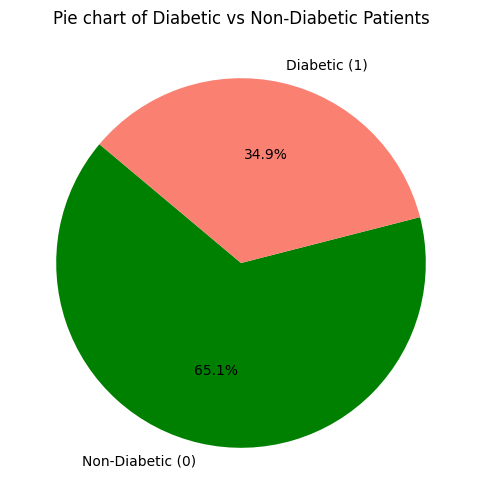

In [6]:
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'salmon'])
plt.title('Pie chart of Diabetic vs Non-Diabetic Patients')
plt.show()

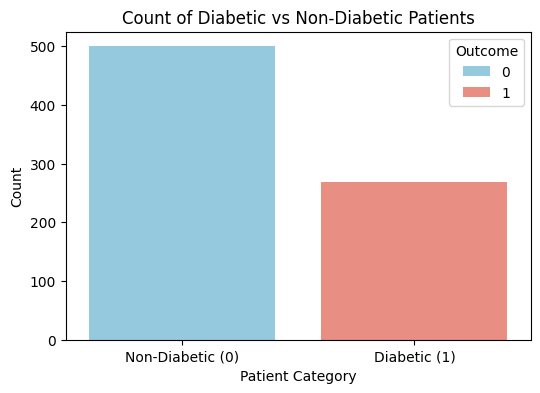

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette={0: 'skyblue', 1: 'salmon'}, hue='Outcome')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel('Patient Category')
plt.ylabel('Count')
plt.title('Count of Diabetic vs Non-Diabetic Patients')
plt.show()


# **PCA-based 2D scatter plot to visualize class overlap:**

In [8]:
X_p = df.drop('Outcome', axis=1)
y_p = df['Outcome']

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_p)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y_p

In [12]:
pca_df

,PC1,PC2,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


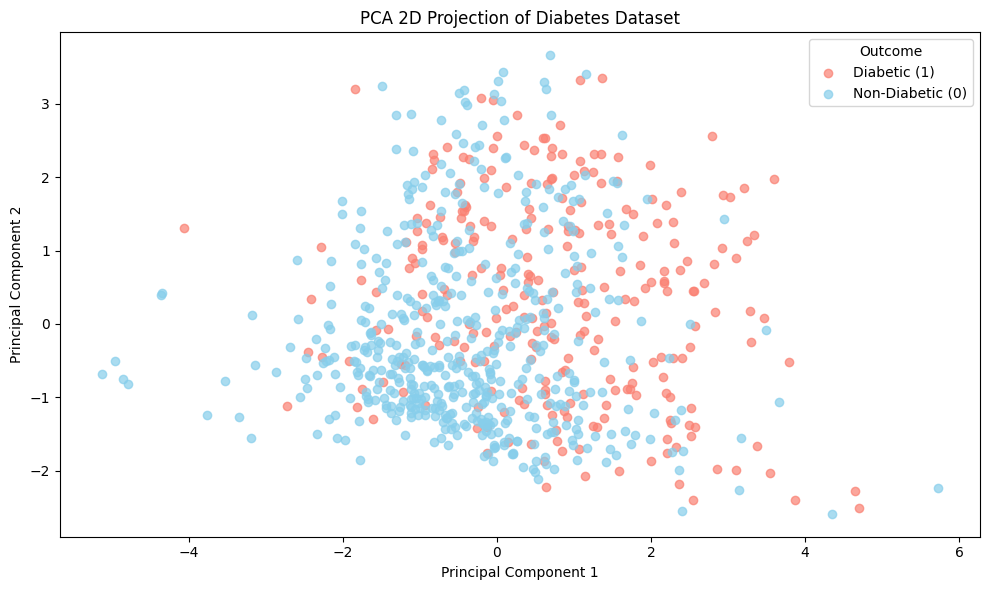

In [13]:
colors = {0: 'skyblue', 1: 'salmon'}

plt.figure(figsize=(10, 6))

for outcome in pca_df['Outcome'].unique():
    subset = pca_df[pca_df['Outcome'] == outcome]
    plt.scatter(subset['PC1'], subset['PC2'],
                color=colors[outcome],
                alpha=0.7,
                label=labels[outcome])

plt.title('PCA 2D Projection of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


# **PCA-based 3D scatter plot to visualize class overlap:**

In [14]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [15]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Outcome'] =y_p

In [16]:
pca_df

,PC1,PC2,PC3,Outcome
0,1.068503,1.234895,-0.095930,1
1,-1.121683,-0.733852,0.712938,0
2,-0.396477,1.595876,-1.760678,1
3,-1.115781,-1.271241,0.663729,0
4,2.359334,-2.184819,-2.963107,1
...,...,...,...,...
763,1.562085,1.923150,0.867408,0
764,-0.100405,-0.614181,0.764353,0
765,-0.283475,0.097065,0.077192,0
766,-1.060324,0.837062,-0.425030,1


/tmp/ipython-input-17-383186349.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=scatter.cmap(scatter.norm(i)), label=label)


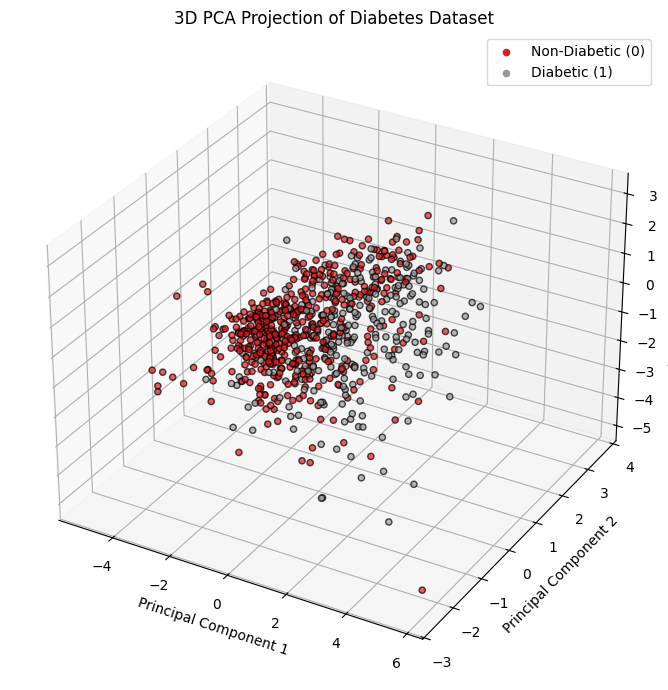

In [17]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                     c=pca_df['Outcome'], cmap='Set1', edgecolor='k', alpha=0.7)

# Set axis labels and title
ax.set_title('3D PCA Projection of Diabetes Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend manually
legend_labels = ['Non-Diabetic (0)', 'Diabetic (1)']
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], c=scatter.cmap(scatter.norm(i)), label=label)
ax.legend()

plt.tight_layout()
plt.show()


# **Seeing the data shape**

In [18]:
df.shape

(768, 9)

# **Data information**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Data Description**

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Nan-Value Checking**

In [21]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:
Y = df['Outcome']
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [23]:
X = df.drop(columns = 'Outcome', axis=1)


In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#**Data Visualization completes here**

# **Splitting the dataset**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,  random_state=2)
print(f"The shape of  X_train is : {X_train.shape}")
print(f"The shape of X_test is : {X_test.shape}")
print(f"The shape of Y_train is : {Y_train.shape}")
print(f"The shape of Y_test is : {Y_test.shape}")

The shape of  X_train is : (614, 8)
The shape of X_test is : (154, 8)
The shape of Y_train is : (614,)
The shape of Y_test is : (154,)


# **Z-score normalization or standardization.(Feature Scaling)**

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **We normalize or stdarize the x_train and the x_test data set not on the labeled dataset.**

# **Kernels (kernel functions used inside SVM — they define how the data is mapped to a higher-dimensional space)**

# **Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. The key idea is to find the optimal hyperplane that separates data points of different classes with the maximum margin.t**

In [82]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']


In [83]:
class_labels = ['Non-Diabetic', 'Diabetic']



===== SVM with linear kernel =====


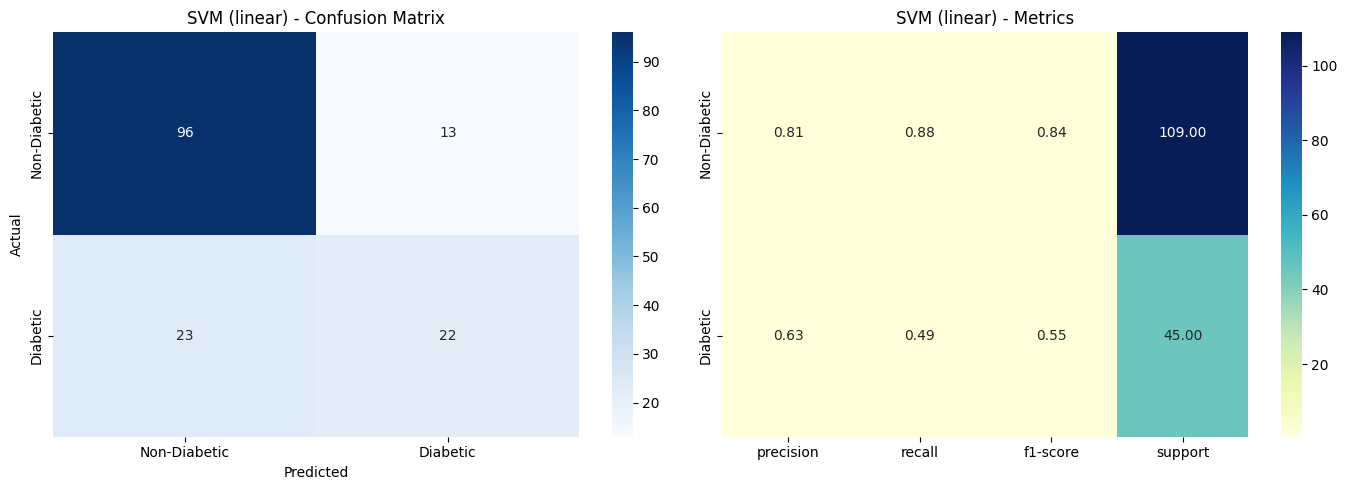

Training Time: 3.9327 seconds
Training Accuracy: 77.20%
Test Accuracy: 76.62%

===== SVM with rbf kernel =====


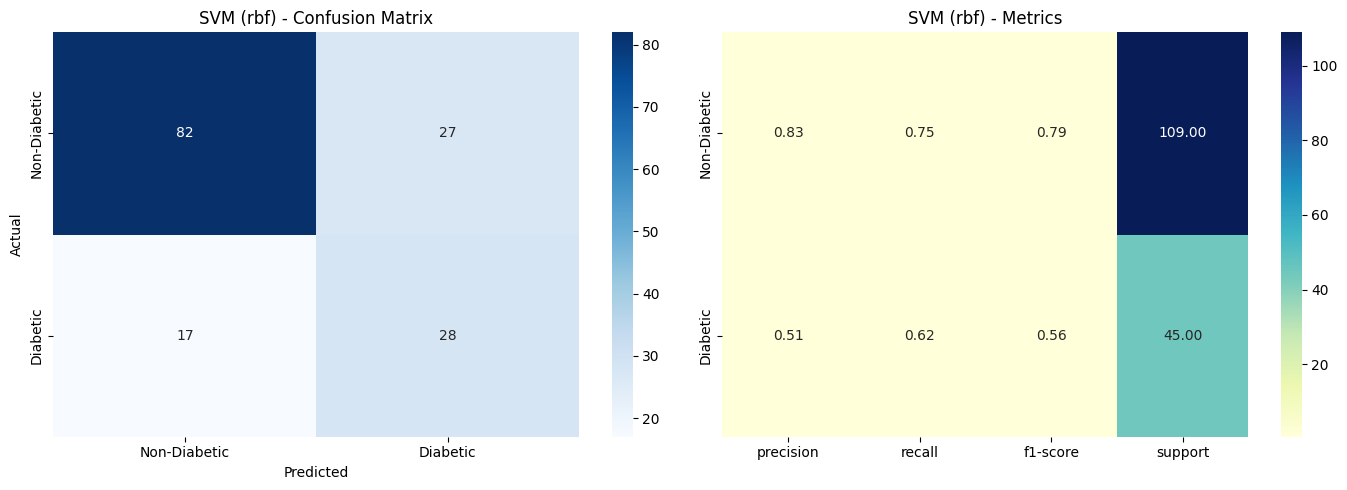

Training Time: 0.0882 seconds
Training Accuracy: 99.67%
Test Accuracy: 71.43%

===== SVM with poly kernel =====


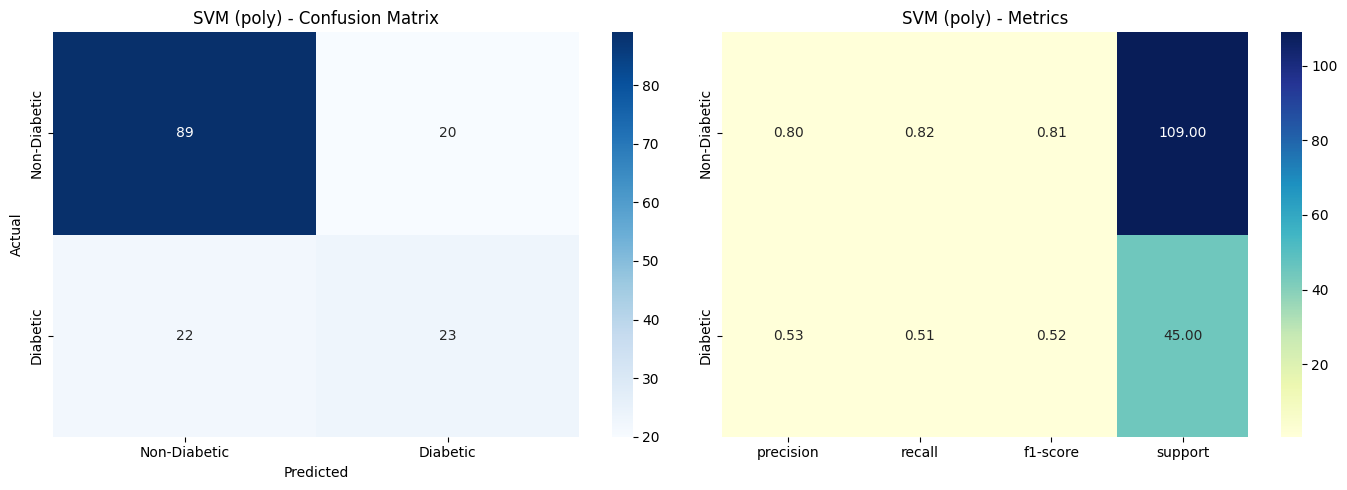

Training Time: 1.8890 seconds
Training Accuracy: 87.62%
Test Accuracy: 72.73%

===== SVM with sigmoid kernel =====


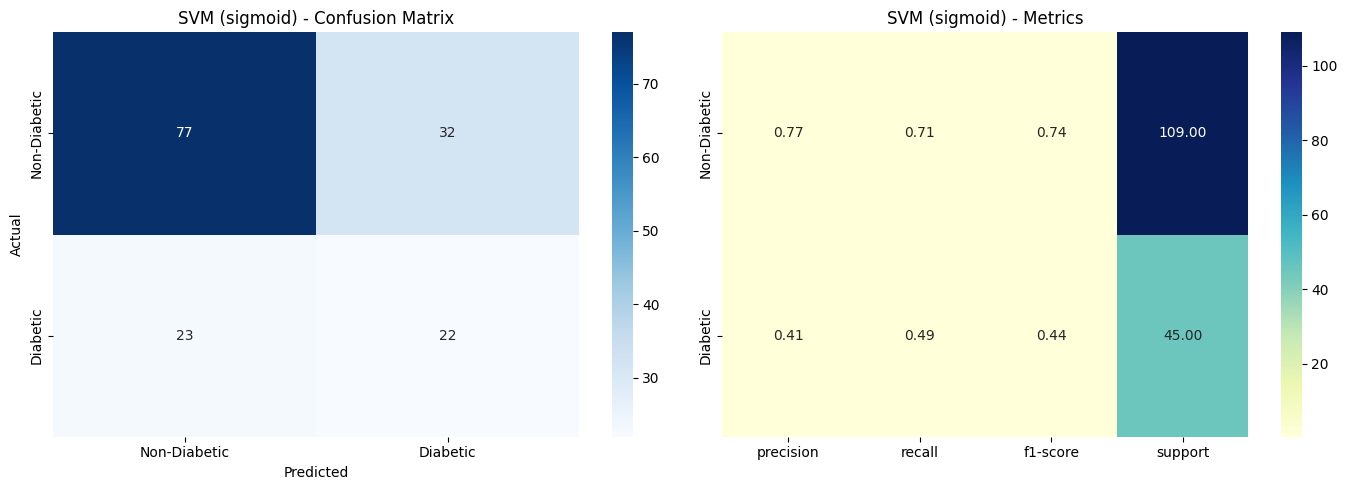

Training Time: 0.0189 seconds
Training Accuracy: 67.59%
Test Accuracy: 64.29%


In [84]:
for kernel in kernels:
    print(f"\n===== SVM with {kernel} kernel =====")
    model = svm.SVC(kernel=kernel,C=1000.0)

    # Train and time
    start_time = time.time()
    model.fit(X_train_scaled, Y_train)
    end_time = time.time()

    # Accuracy
    train_acc = accuracy_score(Y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(Y_test, model.predict(X_test_scaled))

    # Predictions
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, target_names=class_labels, output_dict=True)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=class_labels, yticklabels=class_labels)
    ax[0].set_title(f'SVM ({kernel}) - Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

    metrics_df = pd.DataFrame(report).T.loc[class_labels, ['precision', 'recall', 'f1-score', 'support']]
    sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax[1])
    ax[1].set_title(f'SVM ({kernel}) - Metrics')

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"Training Time: {end_time - start_time:.4f} seconds")
    print(f"Training Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

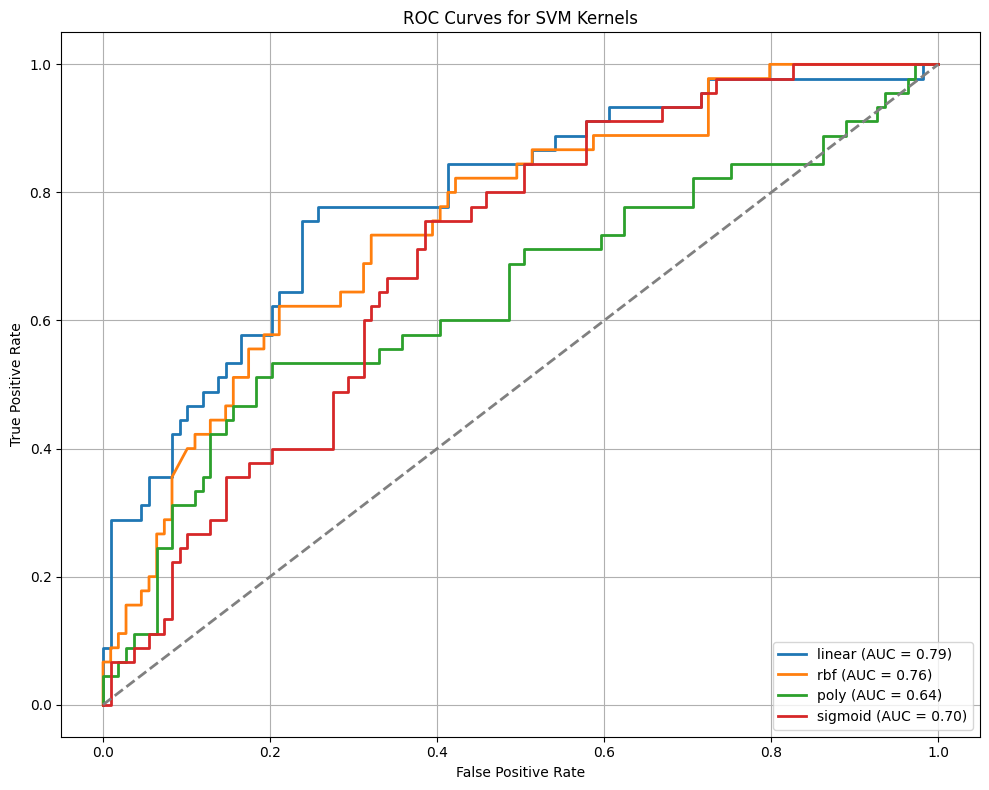

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define kernels and class labels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
class_labels = ['Non-Diabetic', 'Diabetic']

plt.figure(figsize=(10, 8))

# Loop over each kernel
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=1000.0, probability=True, random_state=42)
    model.fit(X_train_scaled, Y_train)

    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{kernel} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Configure the plot
plt.title('ROC Curves for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Decision tree**

# **Model call and training**

In [77]:
dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# **Prediction on test dataset**

In [78]:
y_pred = dt_model.predict(X_test_scaled)

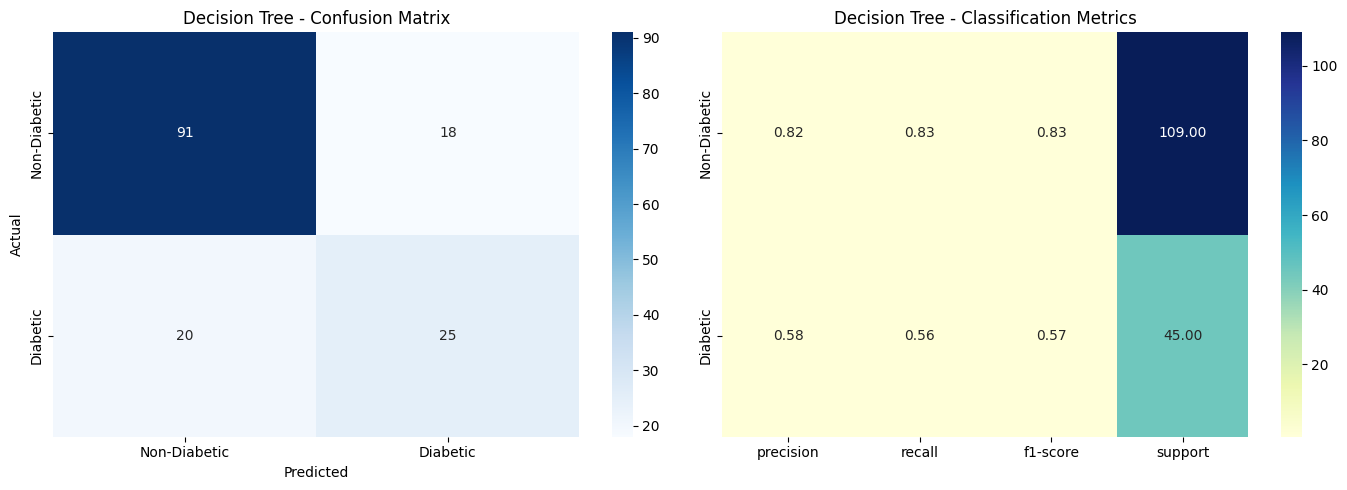

Training Accuracy: 84.69%
Testing Accuracy: 75.32%


In [79]:
class_labels = ['Non-Diabetic', 'Diabetic']
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred, target_names=class_labels, output_dict=True)

# Accuracy
train_acc = accuracy_score(Y_train, dt_model.predict(X_train_scaled))
test_acc = accuracy_score(Y_test, y_pred)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=class_labels, yticklabels=class_labels)
ax[0].set_title('Decision Tree - Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Metrics heatmap
metrics_df = pd.DataFrame(report).T.loc[class_labels, ['precision', 'recall', 'f1-score', 'support']]
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax[1])
ax[1].set_title('Decision Tree - Classification Metrics')

plt.tight_layout()
plt.show()

# Print summary
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")


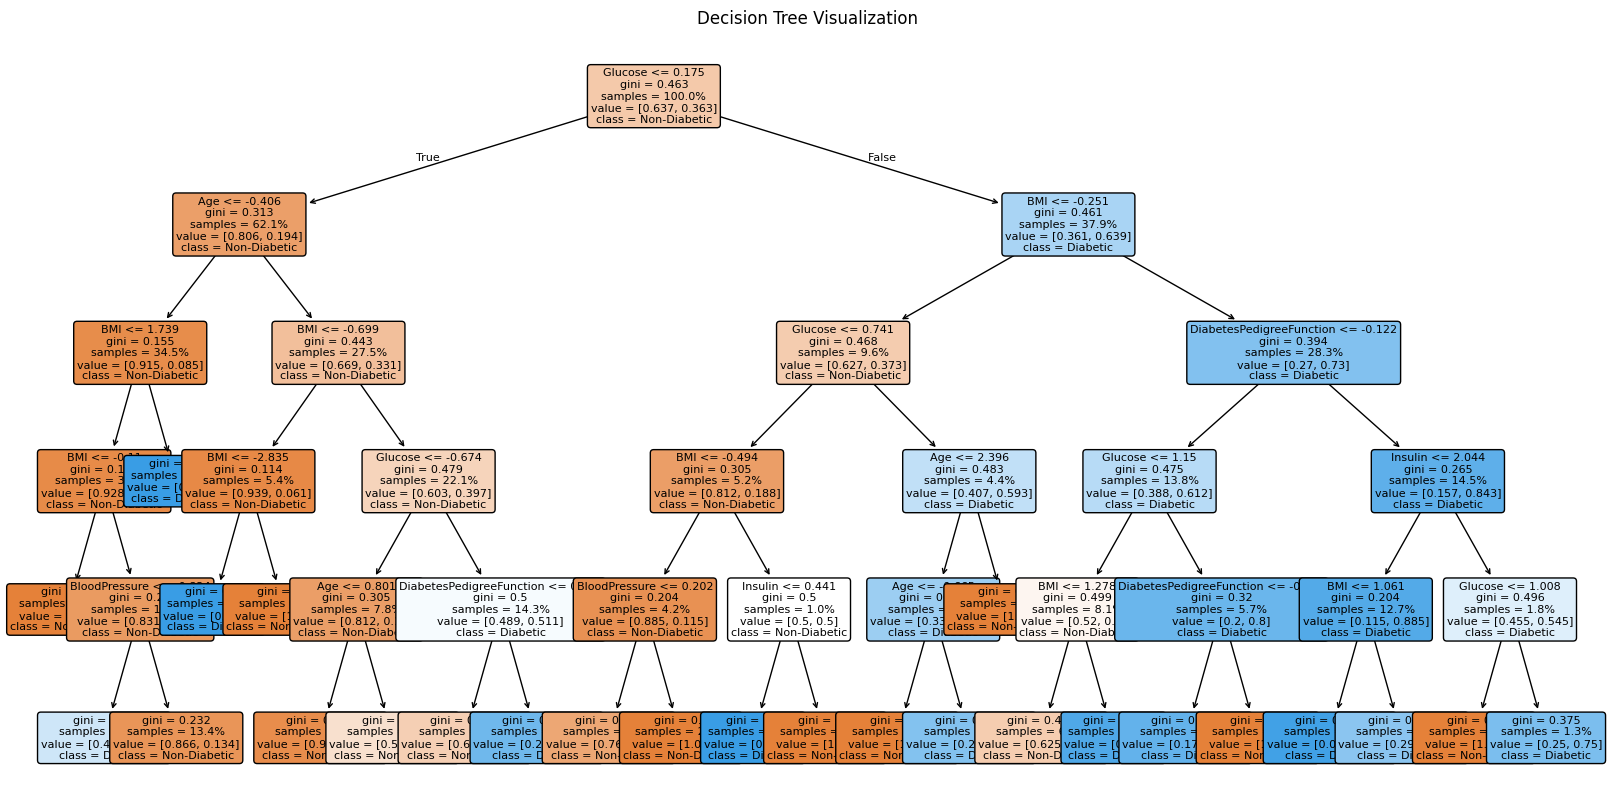

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()


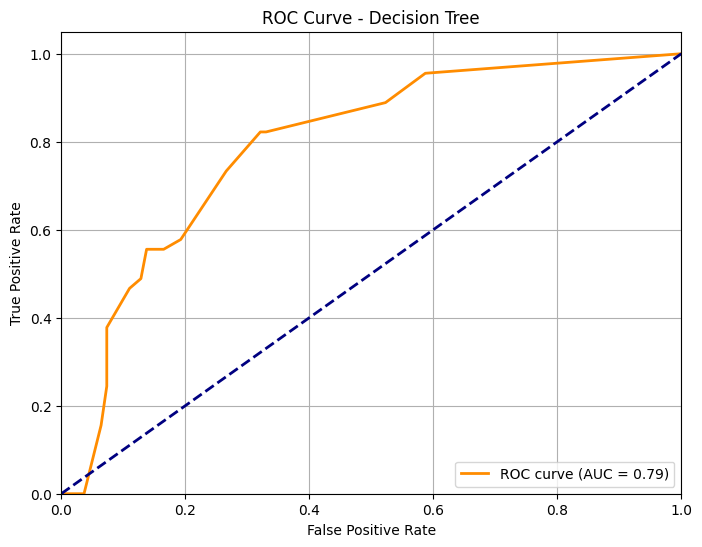

In [81]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Diabetic)
y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Random Forest**

# **Model calling**

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)

In [71]:
start_time = time.time()
rf_classifier.fit(X_train_scaled, Y_train)
end_time = time.time()
print(end_time - start_time)

0.015474319458007812


In [72]:
y_pred_rf = rf_classifier.predict(X_test_scaled)

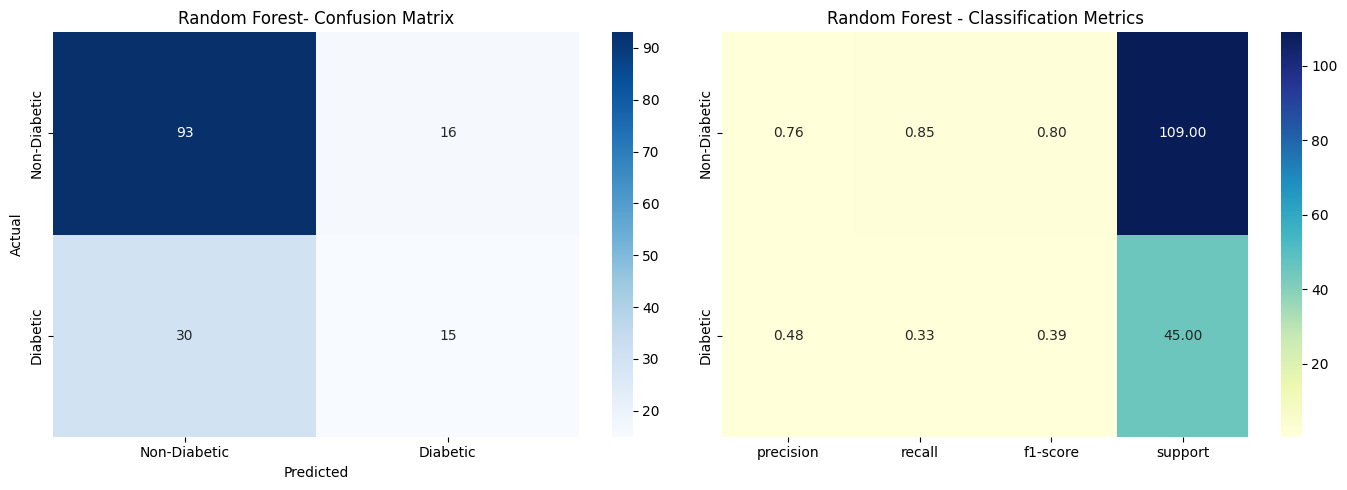

Training Accuracy: 88.60%
Testing Accuracy: 70.13%


In [76]:
class_labels = ['Non-Diabetic', 'Diabetic']
cm = confusion_matrix(Y_test, y_pred_rf)
report = classification_report(Y_test, y_pred_rf, target_names=class_labels, output_dict=True)

# Accuracy
train_acc_rf = accuracy_score(Y_train, rf_classifier.predict(X_train_scaled))
test_ac_rf = accuracy_score(Y_test, y_pred_rf)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=class_labels, yticklabels=class_labels)
ax[0].set_title('Random Forest- Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Metrics heatmap
metrics_df = pd.DataFrame(report).T.loc[class_labels, ['precision', 'recall', 'f1-score', 'support']]
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax[1])
ax[1].set_title('Random Forest - Classification Metrics')

plt.tight_layout()
plt.show()

# Print summary
print(f"Training Accuracy: {train_acc_rf * 100:.2f}%")
print(f"Testing Accuracy: {test_ac_rf * 100:.2f}%")


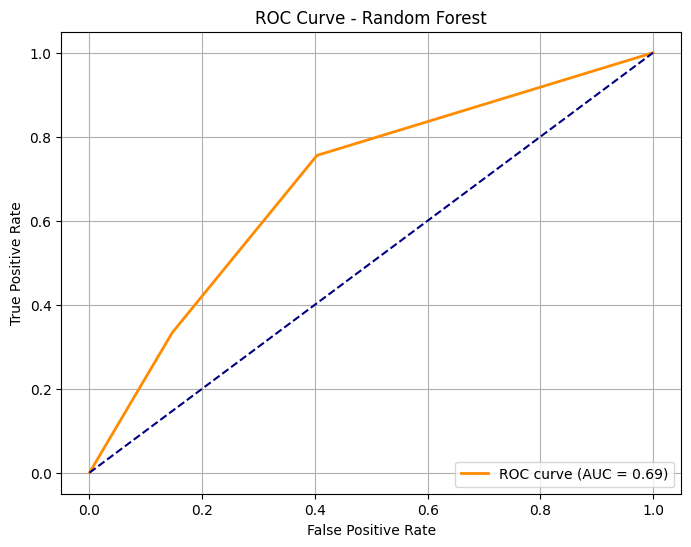

In [74]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **KNN**

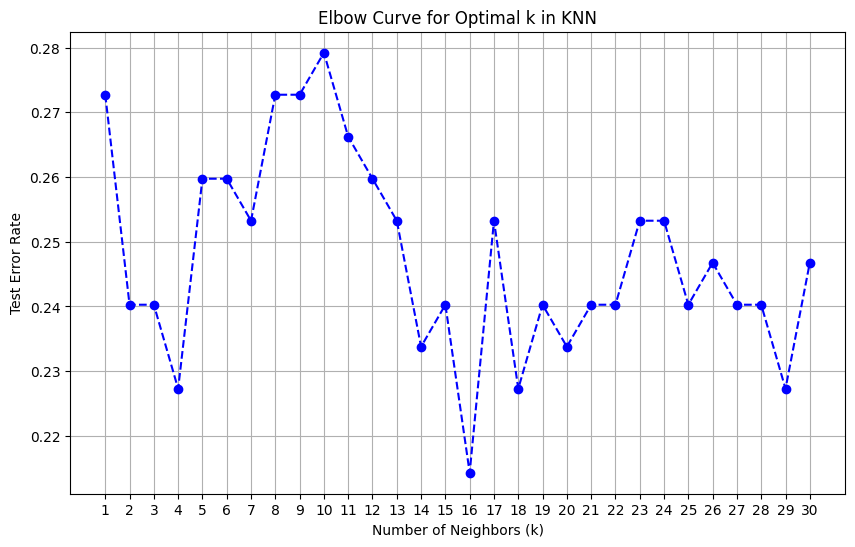

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rates = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(Y_test, y_pred_k)  # test error
    error_rates.append(error)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.show()


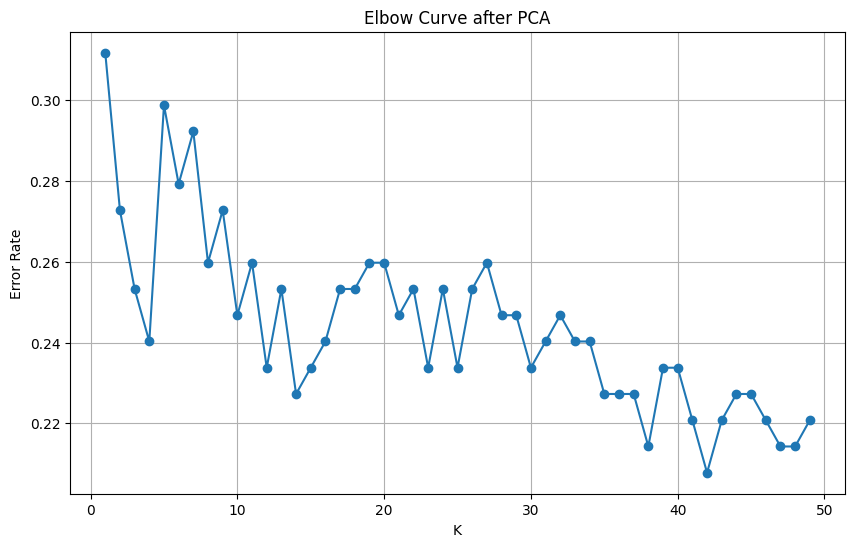

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KNN for different values of k
error_rates = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, Y_train)
    pred_k = knn.predict(X_test_pca)
    error = np.mean(pred_k != Y_test)
    error_rates.append(error)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1,50), error_rates, marker='o', linestyle='-')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Elbow Curve after PCA")
plt.grid(True)
plt.show()


# **Voting**

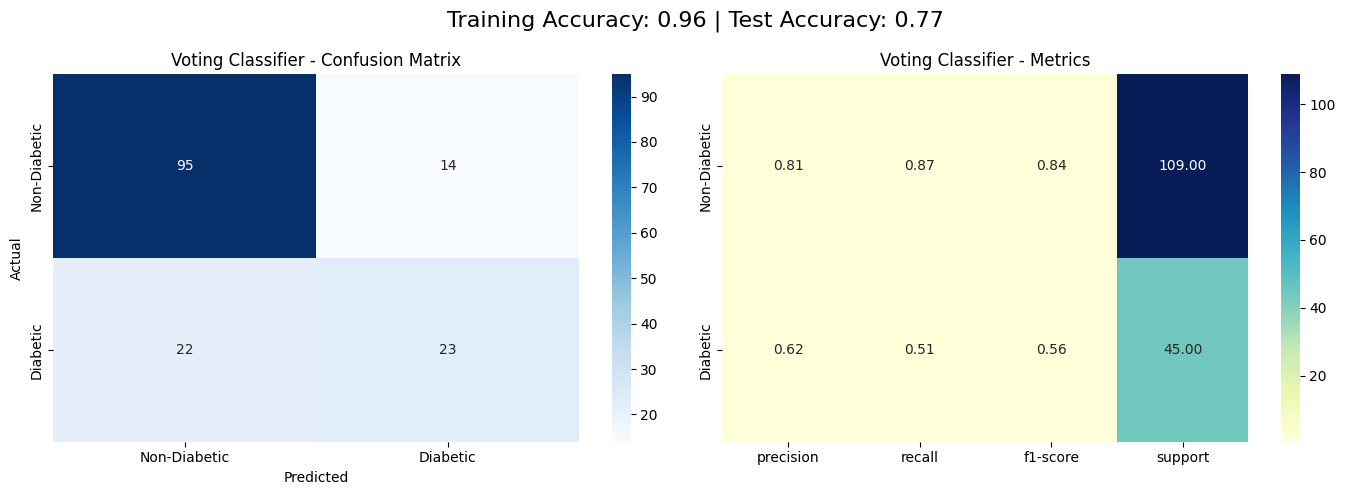

Training Accuracy: 0.96
Test Accuracy: 0.77


In [103]:
# Initialize individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
svm = svm = SVC(probability=True, random_state=42)
logistic = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)

# Initialize the Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[
        ('Decision Tree', decision_tree),
        ('SVM', svm),
        ('Logistic', logistic),
        ('KNN', knn),
        ('Random Forest', rf)
    ],
    voting='soft'
)

# Train the VotingClassifier on the scaled training data
voting_clf.fit(X_train_scaled, Y_train)

# Make predictions on the scaled test data
y_pred = voting_clf.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy = voting_clf.score(X_train_scaled, Y_train)
test_accuracy = voting_clf.score(X_test_scaled, Y_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Classification Report
report = classification_report(Y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'], output_dict=True)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
ax[0].set_title('Voting Classifier - Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Prepare metrics for the second heatmap
metrics_df = pd.DataFrame(report).T.loc[['Non-Diabetic', 'Diabetic'], ['precision', 'recall', 'f1-score', 'support']]
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax[1])
ax[1].set_title('Voting Classifier - Metrics')

# Show accuracies on the plots
plt.suptitle(f"Training Accuracy: {train_accuracy:.2f} | Test Accuracy: {test_accuracy:.2f}", fontsize=16)

plt.tight_layout()
plt.show()

# Print accuracy values
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


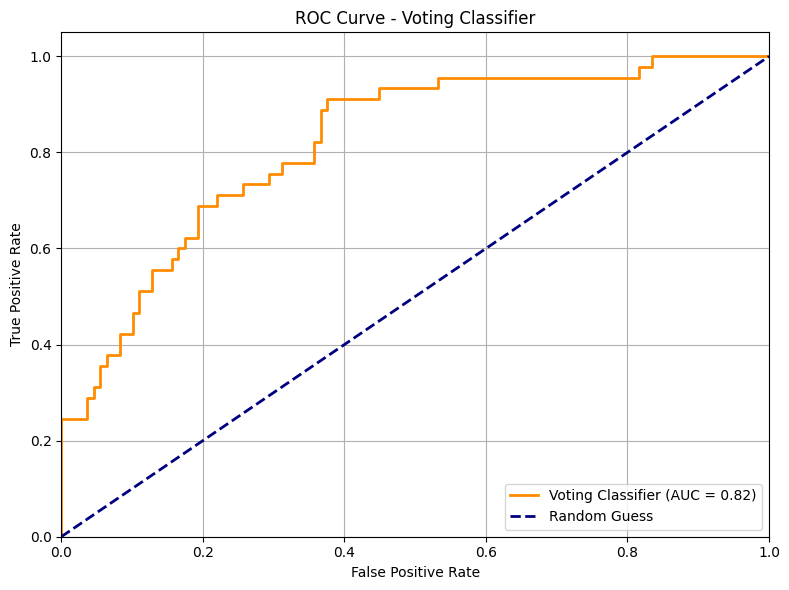

In [104]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Diabetic = class 1)
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
